# Explore the numerical differences between german and dutch

- results in translation of german to dutch variables: `data/validation/variables_translation.json`

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pickle


sys.path.append("../")
from func_preprocess import read_data
sns.set_theme(style="whitegrid", font_scale=1.3, context="paper")

PATH_base = "/home/WUR/katz001/PROJECTS/myaReg-genderDifferences"


In [2]:
''' 
Select features
'''

target = "gender"
percentBoruta = 100
varSet = "fullRegistry"

variables = pd.read_csv(f"{PATH_base}/results/20_featureSelection/{varSet}/boruta/{target}_bootstrapped_iterativeBoruta_{percentBoruta}perc.txt", 
                       header=None)[0].tolist()
variables

['age_erstmanifestation',
 'Diagnosedauer',
 'scoreadl_neu',
 'seelischesbefinden_neu',
 'chronicfatigue_normalised',
 'autoimmunerkrankungen_rbzu',
 'thymektomie_gr']

# Load datasets

In [3]:
###################     Load german data    ###################
target = "gender"
dataset = "fullRegistry"

''' 1. read data '''
data_german = read_data(PATH_base, FILENAME=f"{dataset}")  ### {dataset}_variables
#data_german = data_german.loc[:,variables]
print(data_german.shape)
########################     Load Dutch data    #################################   
data_dutch = pd.read_csv(f"{PATH_base}/data/validation/dutch_MG_patients_V2_recoded.csv", index_col=0)
data_dutch.columns
print(data_dutch.shape)




LOADING DATA
(1814, 40)
(419, 40)


# Check Dutch dataset missigness

In [13]:
missingess_per_var = (data_dutch.isna().sum() / data_dutch.shape[0])*100
missingess_per_var

Age                                   0.000000
gender                                0.000000
questionnaire                         0.000000
MGsubgroup                            0.000000
MGsubgroup_inclPATreported            0.000000
agediag                               0.000000
QantiACHR                            44.152745
QantiMUSK                            74.701671
DiseaseDuration                       0.000000
agefirstsymp                          7.398568
Delay_years                           7.398568
CISfatigue                            0.000000
Fatigue_YES_NO                        0.000000
HADSd                                 0.477327
depression_yes_no                     0.477327
HADSa                                 0.477327
PSQI                                  0.715990
MGadl                                 1.193317
MGqol                                 1.193317
OnlyPyridostigmine                    0.000000
NonSteroid                            0.000000
IVIGorPLEX   

# Compare distribution: german & dutch

- use `_alt` variables or not? 

In [4]:
# def plot_compare_bar2(var_german, var_dutch, title=""):
#     fig, ax = plt.subplots(1,2, figsize=(6,5))
#     df_german[var_german].value_counts(normalize=True).plot.bar(ax=ax[0])
#     df_dutch[var_dutch].value_counts(normalize=True).plot.bar(ax=ax[1], color="green")
#     for axx in [ax[0], ax[1]]:
#         axx.set_ylim(0,1)
#         axx.bar_label(axx.containers[0], fmt='%.2f')
#         axx.set_xticklabels(["No (0)", "Yes (1)"])
#         axx.set_xlabel("")
#     ax[0].set_title("german (discovery)")
#     ax[1].set_title("dutch (validation)")
#     ax[1].set_yticklabels("")
#     fig.suptitle(title)
#     plt.tight_layout()
#     return 


def plot_compare_bar(var_german, var_dutch, title=""):
    fig, ax = plt.subplots(1,1, figsize=(5,5))

    tmp = pd.DataFrame(data_german[var_german].copy().value_counts(normalize=True)).reset_index()
    tmp["dataset"] = "german (discovery)"
    tmp2 = pd.DataFrame(data_dutch[var_dutch].copy().value_counts(normalize=True)).reset_index()
    tmp2["dataset"] = "dutch (validation)"
    tmp.columns = ["target", 'proportion', "dataset"]
    tmp2.columns = ["target", 'proportion', "dataset"]
    tmp_plot = pd.concat([tmp, tmp2], axis=0).melt("dataset", "proportion")
    print(tmp_plot)
    #tmp_plot["xlabel"] = ["No (0)","Yes (1)", "No (0)","Yes (1)"]
    tmp_plot["xlabel"] = tmp["target"].tolist() + tmp2["target"].tolist()
    print(tmp_plot)

    print(tmp)
    bplot = sns.barplot(tmp_plot, x="xlabel", y="value", hue="dataset", ax=ax)
    ax.set_title(title)
    ax.set_ylabel("Proportion")
    ax.set_ylim(0,1)
    ax.set_xlabel("")
    ax.legend(title="")
    plt.tight_layout()
    return  tmp_plot, bplot


def plot_compare_density_violin(var_german, var_dutch, title="", unit=''):
    fig, ax = plt.subplots(1,1, figsize=(5,5))
    tmp = data_german[[var_german]].copy()   #creatinine_preop
    tmp["dataset"] = "german (discovery)"
    tmp2 = data_dutch[[var_dutch]].copy()    # Adm_pres_Creat
    tmp2["dataset"] = "dutch (validation)"
    tmp2.columns = tmp.columns.tolist()
    tmp_plot = pd.concat([tmp, tmp2], axis=0).melt("dataset")

    sns.violinplot(data=tmp_plot, x="variable", y="value", hue="dataset", split=True, ax=ax,
                    gap=.05,inner="quart")
    
    ax.set_title(title)
    ax.set_ylabel(unit)
    ax.set_xlabel("")
    ax.set_xticklabels([])
    ax.legend(title="")

    plt.tight_layout()
    return tmp_plot

# Table

## Binary

In [5]:
var_german="autoimmunerkrankungen_rbzu", 
var_dutch="AIDhistory"

print(data_german.loc[:, var_german].value_counts())
print(data_german.loc[:, var_german].value_counts(normalize=True)*100, "\n\n")

print(data_dutch.loc[:, var_dutch].value_counts())
print(data_dutch.loc[:, var_dutch].value_counts(normalize=True)*100)

autoimmunerkrankungen_rbzu
0                             1045
1                              394
Name: count, dtype: int64
autoimmunerkrankungen_rbzu
0                             72.619875
1                             27.380125
Name: proportion, dtype: float64 


AIDhistory
0.0    301
1.0     96
Name: count, dtype: int64
AIDhistory
0.0    75.81864
1.0    24.18136
Name: proportion, dtype: float64


## Continuous

In [9]:
var_german="chronicfatigue_normalised" 
var_dutch="CISfatigue_minmax"

print(data_german.loc[:, var_german].mean(), data_german.loc[:, var_german].std(), "\n\n")
print(data_dutch.loc[:, var_dutch].mean(), data_dutch.loc[:, var_dutch].std())

0.4975698060804444 0.20212994454204294 


0.6059566428003181 0.27319032302527946


# Figures

              dataset    variable     value
0  german (discovery)  proportion  0.561742
1  german (discovery)  proportion  0.438258
2  dutch (validation)  proportion  0.529833
3  dutch (validation)  proportion  0.470167
              dataset    variable     value  xlabel
0  german (discovery)  proportion  0.561742       1
1  german (discovery)  proportion  0.438258       0
2  dutch (validation)  proportion  0.529833       1
3  dutch (validation)  proportion  0.470167       0
   target  proportion             dataset
0       1    0.561742  german (discovery)
1       0    0.438258  german (discovery)


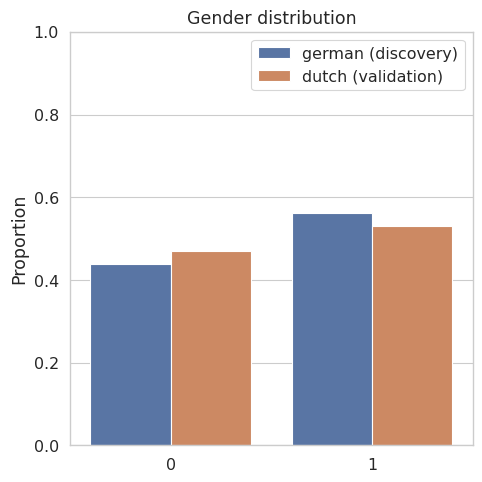

In [8]:
'''
Gender
'''
tmp, bplot = plot_compare_bar(var_german="gender", 
                var_dutch="gender", 
                title="Gender distribution")

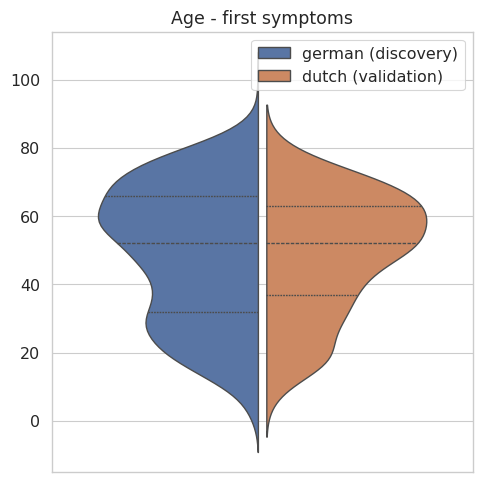

In [9]:
'''
Age_erstmanifestation
'''
tmp = plot_compare_density_violin(
    var_german="age_erstmanifestation", 
    var_dutch="agefirstsymp", 
    title="Age - first symptoms")

#

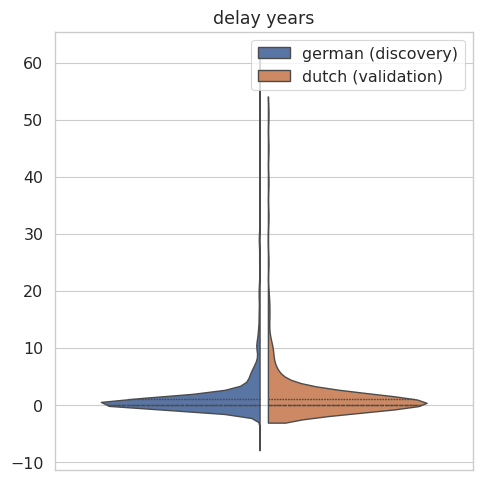

In [10]:
'''
Diagnosedauer
'''
tmp = plot_compare_density_violin(
    var_german="Diagnosedauer", 
    var_dutch="Delay_years", 
    title="delay years")

#

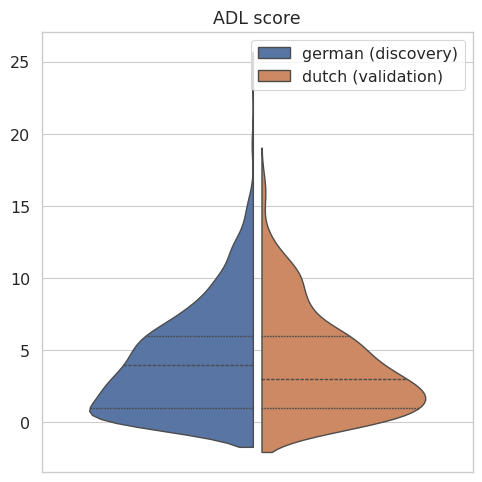

In [11]:
'''
scoreadl_neu
'''
tmp = plot_compare_density_violin(
    var_german="scoreadl_neu", 
    var_dutch="MGadl", 
    title="ADL score")

#

In [12]:
data_german["autoimmunerkrankungen_rbzu"]

pid
P7X50M0V       0
0X13811D    <NA>
002D7Y7Z       0
002G71A3    <NA>
00C4EK1J       0
            ... 
ZWUVEM64       0
ZXX7E4X4       0
ZY91U2Q2       0
ZZEHZKCR       0
ZZZ1Y1R6    <NA>
Name: autoimmunerkrankungen_rbzu, Length: 1814, dtype: Int64

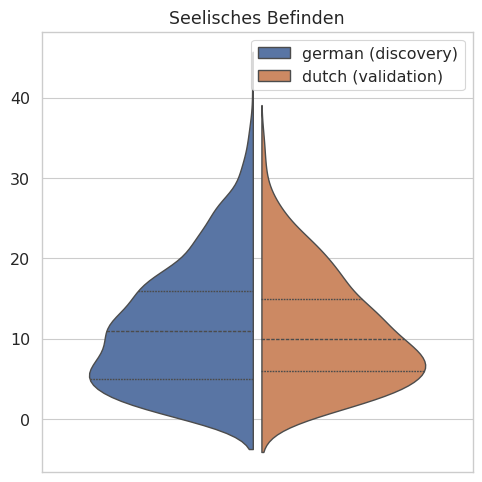

In [13]:
'''
seelischesbefinden_neu
'''
tmp = plot_compare_density_violin(
    var_german="seelischesbefinden_neu", 
    var_dutch="HADS_comb", 
    title="Seelisches Befinden")
#

              dataset    variable     value
0  german (discovery)  proportion  0.726199
1  german (discovery)  proportion  0.273801
2  dutch (validation)  proportion  0.758186
3  dutch (validation)  proportion  0.241814
              dataset    variable     value  xlabel
0  german (discovery)  proportion  0.726199     0.0
1  german (discovery)  proportion  0.273801     1.0
2  dutch (validation)  proportion  0.758186     0.0
3  dutch (validation)  proportion  0.241814     1.0
   target  proportion             dataset
0       0    0.726199  german (discovery)
1       1    0.273801  german (discovery)


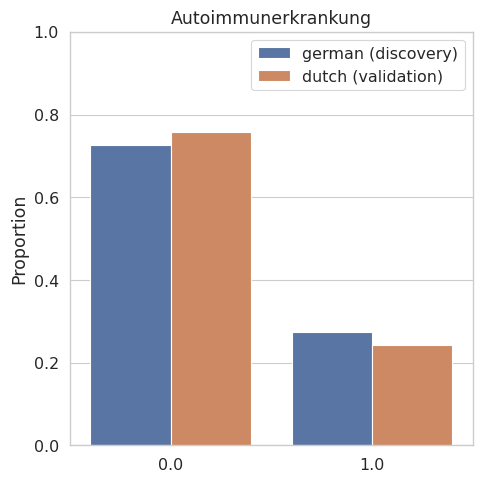

In [14]:
'''
Gender
'''
tmp = plot_compare_bar(var_german="autoimmunerkrankungen_rbzu", 
                var_dutch="AIDhistory", 
                title="Autoimmunerkrankung")

              dataset    variable     value
0  german (discovery)  proportion  0.753573
1  german (discovery)  proportion  0.246427
2  dutch (validation)  proportion  0.815013
3  dutch (validation)  proportion  0.184987
              dataset    variable     value  xlabel
0  german (discovery)  proportion  0.753573     1.0
1  german (discovery)  proportion  0.246427     0.0
2  dutch (validation)  proportion  0.815013     1.0
3  dutch (validation)  proportion  0.184987     0.0
   target  proportion             dataset
0       1    0.753573  german (discovery)
1       0    0.246427  german (discovery)


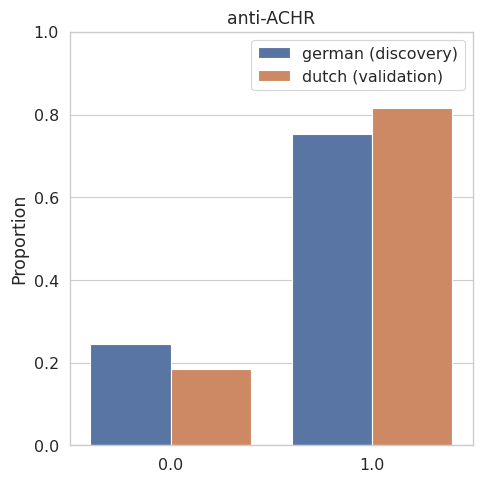

In [15]:
'''
anti-ACHR
'''
tmp = plot_compare_bar(var_german="achrak_rb", 
                var_dutch="MGsubgroup_inclPATreported_achrak",          #QantiACHR
                title="anti-ACHR")

              dataset    variable     value
0  german (discovery)  proportion   0.61427
1  german (discovery)  proportion   0.38573
2  dutch (validation)  proportion  0.626566
3  dutch (validation)  proportion  0.373434
              dataset    variable     value  xlabel
0  german (discovery)  proportion   0.61427     0.0
1  german (discovery)  proportion   0.38573     1.0
2  dutch (validation)  proportion  0.626566     0.0
3  dutch (validation)  proportion  0.373434     1.0
   target  proportion             dataset
0       0     0.61427  german (discovery)
1       1     0.38573  german (discovery)


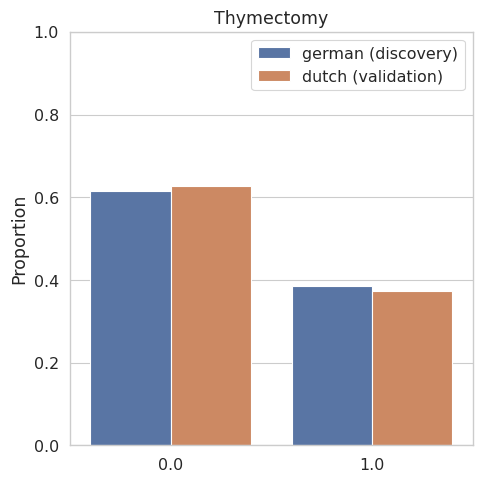

In [16]:
'''
thymectomy
'''
tmp = plot_compare_bar(var_german="thymektomie_gr", 
                var_dutch="Thymectomy", 
                title="Thymectomy")

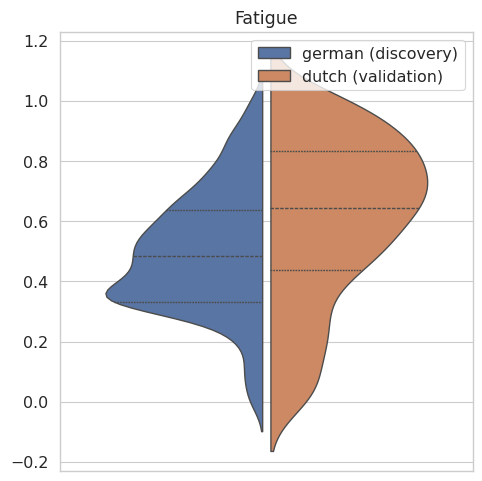

In [17]:
'''
chronic fatigue
'''
tmp = plot_compare_density_violin(var_german="chronicfatigue_normalised", 
                var_dutch="CISfatigue_minmax", 
                title="Fatigue")